In [2]:
import pandas as pd

In [3]:
addata=pd.read_csv(r'C:\Users\genus\OneDrive\Documents\flights\adveiwership.csv')

In [4]:
addata

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [5]:
addata.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [10]:
impressiondata=addata.groupby(['fb_campaign_id'])['Impressions'].sum().sort_values(ascending=False).reset_index()
impressiondata=impressiondata.head(5)


In [13]:
clickdata=addata.groupby(['fb_campaign_id'])['Clicks'].sum().sort_values(ascending=False).reset_index()
clickdata=clickdata.head(5)

In [17]:
conversiondata=addata.groupby(['fb_campaign_id'])['Total_Conversion'].sum().sort_values(ascending=False).reset_index()
conversiondata=conversiondata.head(5)

In [18]:
conversiondata

,fb_campaign_id,Total_Conversion
0,144532,94
1,144533,73
2,144554,66
3,144659,63
4,144531,58


<AxesSubplot:xlabel='fb_campaign_id', ylabel='Impressions'>

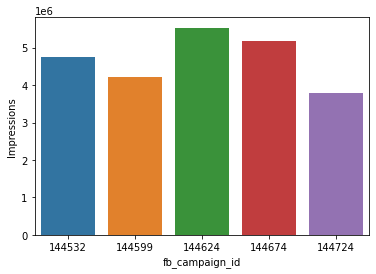

In [12]:
import seaborn as sns
sns.barplot(x='fb_campaign_id',y='Impressions',data=impressiondata)

<AxesSubplot:xlabel='fb_campaign_id', ylabel='Clicks'>

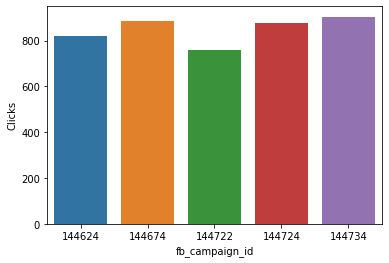

In [15]:
import seaborn as sns
sns.barplot(x='fb_campaign_id',y='Clicks',data=clickdata)

<AxesSubplot:xlabel='fb_campaign_id', ylabel='Total_Conversion'>

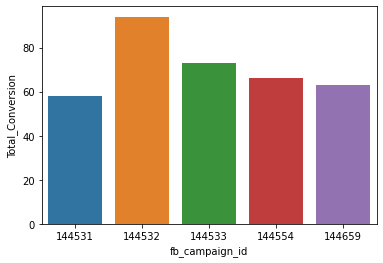

In [19]:
import seaborn as sns
sns.barplot(x='fb_campaign_id',y='Total_Conversion',data=conversiondata)

<AxesSubplot:xlabel='age', ylabel='Total_Conversion'>

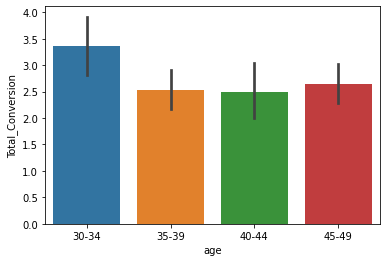

In [65]:
import seaborn as sns
sns.barplot(x='age',y='Total_Conversion',data=addata)

<AxesSubplot:xlabel='age', ylabel='Clicks'>

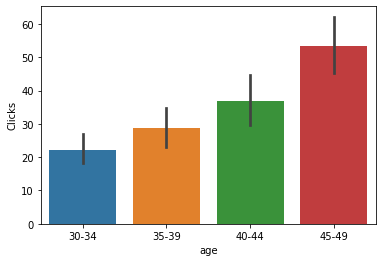

In [66]:
import seaborn as sns
sns.barplot(x='age',y='Clicks',data=addata)

<AxesSubplot:xlabel='age', ylabel='Impressions'>

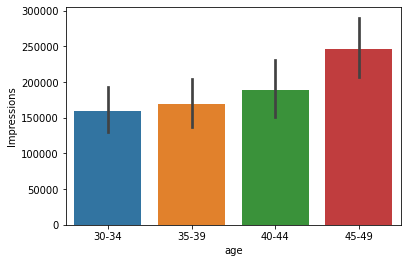

In [67]:
import seaborn as sns
sns.barplot(x='age',y='Impressions',data=addata)

<AxesSubplot:xlabel='age', ylabel='interest'>

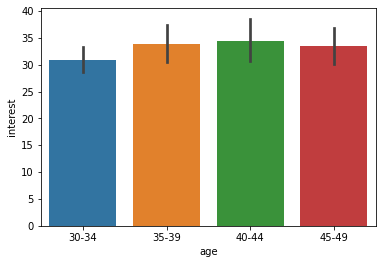

In [68]:
import seaborn as sns
sns.barplot(x='age',y='interest',data=addata)

In [20]:
addata.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [25]:
features=addata[[ 'age', 'gender', 'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion']]

In [26]:
features['age']=features['age'].astype('category')
features['age']=features['age'].cat.codes
features['gender']=features['gender'].astype('category')
features['gender']=features['gender'].cat.codes

C:\Users\genus\AppData\Local\Temp/ipykernel_66876/1305101494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['age']=features['age'].astype('category')
C:\Users\genus\AppData\Local\Temp/ipykernel_66876/1305101494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['age']=features['age'].cat.codes
C:\Users\genus\AppData\Local\Temp/ipykernel_66876/1305101494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
features=features.fillna(0)

In [33]:
features

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion
0,0,1,15,7350,1,1.430000,2
1,0,1,16,17861,2,1.820000,2
2,0,1,20,693,0,0.000000,1
3,0,1,28,4259,1,1.250000,1
4,0,1,28,4133,1,1.290000,1
...,...,...,...,...,...,...,...
1138,3,0,109,1129773,252,358.189997,13
1139,3,0,110,637549,120,173.880003,3
1140,3,0,111,151531,28,40.289999,2
1141,3,0,113,790253,135,198.710001,8


In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(features)

StandardScaler()

In [37]:
scaler=scaler.transform(features)

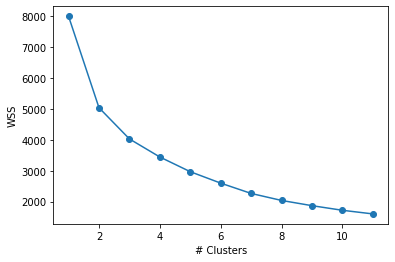

In [45]:
import matplotlib.pyplot as plt
cluster_range=range(1,12)
cluster_wss=[]
from sklearn.cluster import KMeans
for num_cluster in range(1,12):
    clusters = KMeans(num_cluster)
    clusters.fit(scaler)
    cluster_wss.append(clusters.inertia_)
    
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o')
plt.show()

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for num_cluster in range(2,12):
    clusters = KMeans(num_cluster)
    clusters.fit(scaler)
    label=clusters.predict(scaler)
    print("Sillouhette score ",silhouette_score(scaler, label))
    

Sillouhette score  0.5408293037287006
Sillouhette score  0.315686096656599
Sillouhette score  0.3432070244574552
Sillouhette score  0.3448108114785147
Sillouhette score  0.34619868306290474
Sillouhette score  0.3841105900056869
Sillouhette score  0.389273572286213
Sillouhette score  0.3956523527540327
Sillouhette score  0.3970092258836042
Sillouhette score  0.4066514454211749


In [51]:
#Based on the sillouhette score checking the optimal value of K as 2
clusters = KMeans(2)
clusters.fit(scaler)
addata['cluster']=clusters.predict(scaler)


In [54]:
cluster1data=addata[addata['cluster']==1]

In [61]:
cluster2data=addata[addata['cluster']==0]

In [62]:
cluster2data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cluster
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1131,1314403,1178,179970,45-49,F,102,168714,24,36.010001,2,2,0
1132,1314404,1178,179971,45-49,F,103,71982,11,16.340001,1,0,0
1135,1314407,1178,179974,45-49,F,106,107100,23,33.710001,1,0,0
1137,1314409,1178,179976,45-49,F,108,212508,33,47.690000,4,1,0


In [55]:
cluster1data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cluster
count,1.340000e+02,134.000000,134.000000,134.000000,1.340000e+02,134.000000,134.000000,134.000000,134.000000,134.0
mean,1.155152e+06,1174.388060,151288.104478,40.201493,8.988679e+05,165.440299,252.264104,10.925373,3.410448,1.0
std,9.170855e+04,29.453649,14971.196260,35.394188,3.833772e+05,65.812620,100.048248,8.851852,3.600778,0.0
min,7.385920e+05,936.000000,109850.000000,7.000000,4.277720e+05,67.000000,105.219997,1.000000,0.000000,1.0
25%,1.121603e+06,1178.000000,144624.000000,16.000000,6.375738e+05,119.250000,178.085000,5.000000,1.000000,1.0
50%,1.121970e+06,1178.000000,144685.000000,27.000000,8.302240e+05,147.000000,234.799999,9.000000,2.000000,1.0
75%,1.122271e+06,1178.000000,144735.500000,63.000000,1.054000e+06,202.000000,299.124999,13.750000,4.000000,1.0
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,1.0


In [57]:
cluster1data[['interest','Impressions','Clicks','Spent','Total_Conversion']].mean()

interest                40.201493
Impressions         898867.932836
Clicks                 165.440299
Spent                  252.264104
Total_Conversion        10.925373
dtype: float64

In [63]:
cluster2data[['interest','Impressions','Clicks','Spent','Total_Conversion']].mean()

interest               31.778989
Impressions         92157.111001
Clicks                 15.853320
Spent                  24.679723
Total_Conversion        1.783944
dtype: float64

#Here we see cluster2data has very low returns in terms of customer responses and conversions. The spend is also low. Our Analysis shows that ads with higher spends tend to generate more responses and conversions. So it is recommended to focus on campaigns which have higher spends. We can look at the average values of cluster 1 and keep a threshold  spend of 250k USD as a threshold for deciding on campaigns to pursue which can be more profitable